## sklearn 시작하기

In [1]:
#!pip install watermark

In [2]:
#%load_ext watermark
#%watermark -u -d -p numpy, pandas, matplotlib, sklearn

In [3]:
from sklearn import datasets
import numpy as np

In [4]:
# dataset에서 data뽑기
iris = datasets.load_iris()
iris
x= iris.data[:, [2,3]]
y = iris.target
np.unique(y)

array([0, 1, 2])

In [5]:
def plot_decision_regions(x, y, classifier, resolution=0.02):

    # 마커와 컬러맵을 설정합니다
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다
    x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # 샘플의 산점도를 그립니다
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=x[y == cl, 0], 
                    y=x[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

## train data와 test data를 나누기

In [6]:
from sklearn.model_selection import train_test_split 

In [7]:
# train data와 test data를 나누기
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=777, test_size = 0.3, stratify=y)
print(np.bincount(y))

[50 50 50]


In [8]:
print(np.bincount(y))
print(np.bincount(y_train))
print(np.bincount(y_test))

[50 50 50]
[35 35 35]
[15 15 15]


## 표준화하기

In [9]:
# data 표준화 (x-x.mean)/x.std
from sklearn.preprocessing import StandardScaler

In [10]:
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)

sc.fit(x_test)
x_test_std = sc.transform(x_test)

## Perceptron(뉴럴렛)

In [11]:
from sklearn.linear_model import Perceptron

In [12]:
# tol => 허용에러 eta0 = 학습률
ppn = Perceptron(max_iter=40, eta0=0.1, tol=1e-3)
ppn.fit(x_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=40, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [13]:
y_pred=ppn.predict(x_test_std)
y_pred



array([0, 1, 0, 1, 0, 1, 1, 2, 2, 0, 2, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 0,
       2, 0, 1, 1, 1, 2, 0, 1, 1, 2, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1])

## 예측 정확도 계산하기

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8

In [15]:
#sklearn의 함수를 사용하지 않더라도 쉽게 계산가능하다
np.mean( y_test==y_pred)

0.8

In [16]:
print(y_pred)
print(y_test)

[0 1 0 1 0 1 1 2 2 0 2 1 1 1 0 1 1 2 1 1 1 0 2 0 1 1 1 2 0 1 1 2 0 1 0 0 1
 0 1 1 0 0 0 0 1]
[0 1 0 1 1 2 1 2 2 0 2 2 1 2 0 1 1 2 1 2 2 0 2 0 2 1 1 2 0 1 1 2 0 1 0 0 1
 0 1 2 0 0 0 0 2]


In [17]:
# random_state에 따른 정확도
for i in range(10):
    pp = Perceptron(max_iter=40, eta0=0.1, tol=1e-3, random_state=i)
    pp.fit(x_train_std, y_train)
    y_pre=pp.predict(x_test_std)
    print(accuracy_score(y_test, y_pre))
"""
random_state의 의미
일정한 random값을 추출할 수 있도록 함
random으로 초기값을 지정할 때 그 초기값을 고정하는 역할을 한다
"""

0.8
0.8666666666666667
0.7555555555555555
0.8888888888888888
0.7777777777777778
0.7777777777777778
0.6888888888888889
0.9333333333333333
0.8666666666666667
0.7555555555555555


'\nrandom_state의 의미\n일정한 random값을 추출할 수 있도록 함\nrandom으로 초기값을 지정할 때 그 초기값을 고정하는 역할을 한다\n'

## 로지스틱

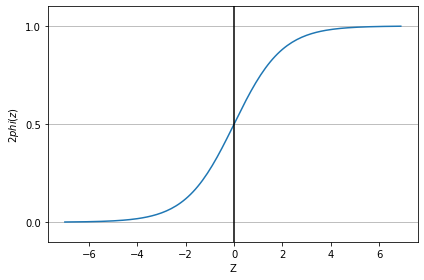

In [18]:
# sigmoid함수
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

z = np.arange(-7,7,0.1)
phi_z = sigmoid(z)
plt.plot(z,phi_z)
plt.axvline(0,0,color='k')
plt.ylim(-0.1,1.1)
plt.xlabel('Z')
plt.ylabel('$2phi(z)$')
plt.yticks([0.0,0.5,1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

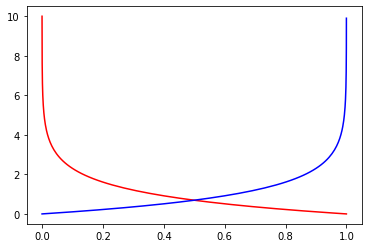

In [19]:
# cost함수를 어떻게 그리냐하면
#y=1이 정답인 경우
def cost_1(z):
    return -np.log(sigmoid(z))
#y=-1이 정답인 경우
def cost_2(z):
    return -np.log(1-sigmoid(z))
z = np.arange(-10,10,0.1)
phi_z = sigmoid(z)

c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, c='red')
c0 = [cost_2(x) for x in z]
plt.plot(phi_z, c0, c='blue')
#plt.plot(z, z, c='black')

##### 오차제곱합 대신 로지스틱 비용으로


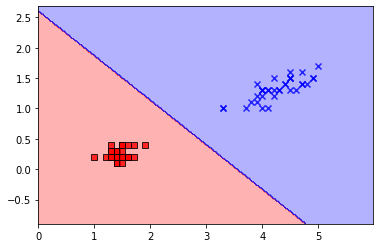

In [20]:
### binary classification
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear', multi_class='auto', C=100, random_state=1)
# C penalty값(규제값)
from matplotlib.colors import ListedColormap

x_train1 = x_train[(y_train==0)|(y_train==1)]
y_train1 = y_train[(y_train==0)|(y_train==1)]
lr.fit(x_train1, y_train1)
LogisticRegression(solver='liblinear', multi_class='auto', C=100, random_state=1)
plot_decision_regions(x=x_train1, y=y_train1, classifier=lr) 


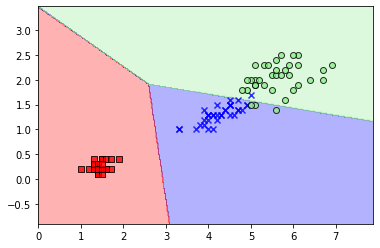

In [21]:
### multi classification
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear', multi_class='auto', C=100, random_state=1)
lr.fit(x_train, y_train)
plot_decision_regions(x=x_train, y=y_train, classifier=lr) 

In [22]:
# 정확도 계산하기
predictions = lr.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

# 각 개체가 각 클래스에 들어갈 확률
print(lr.predict_proba(x_test))

# 각 개체별 가장 포함될 확률이 높은 클래스
print(lr.predict_proba(x_test).argmax(axis=1))

0.9555555555555556
[[8.36430228e-01 1.63569766e-01 5.58998838e-09]
 [1.35556125e-04 7.06725368e-01 2.93139076e-01]
 [8.17509724e-01 1.82490269e-01 7.35271233e-09]
 [4.49567325e-02 9.53928795e-01 1.11447266e-03]
 [2.44419296e-01 7.54725729e-01 8.54975012e-04]
 [8.21518939e-05 4.09501106e-01 5.90416742e-01]
 [1.77171845e-02 9.66569142e-01 1.57136739e-02]
 [8.22021410e-09 4.10840266e-01 5.89159726e-01]
 [3.71795651e-06 2.19740022e-01 7.80256260e-01]
 [8.54253408e-01 1.45746588e-01 4.24315870e-09]
 [7.00540325e-08 1.18556448e-01 8.81443482e-01]
 [3.96357858e-06 2.96495838e-01 7.03500198e-01]
 [1.41683885e-03 9.53942854e-01 4.46403071e-02]
 [6.94103901e-08 4.45092085e-01 5.54907846e-01]
 [7.97656143e-01 2.02343847e-01 9.65765923e-09]
 [2.00527169e-04 8.27732432e-01 1.72067041e-01]
 [2.11964357e-04 7.36668360e-01 2.63119676e-01]
 [7.47318732e-08 1.70750898e-01 8.29249027e-01]
 [8.49439301e-04 9.66553473e-01 3.25970880e-02]
 [8.49643069e-06 2.76438519e-01 7.23552984e-01]
 [3.50537262e-07 3.93

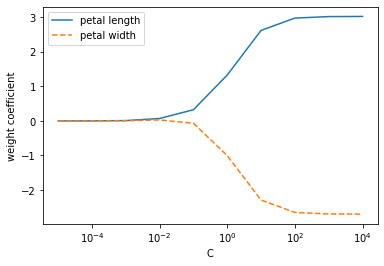

In [23]:
# 규제를 통한 과접합 방지

weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(solver='liblinear', multi_class='auto', C=10.**c, random_state=1)
    lr.fit(x_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='petal length')
plt.plot(params, weights[:, 1], linestyle='--',
         label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

In [24]:
 lr.coef_

array([[-9.80500276, -7.67147036],
       [ 3.02034684, -2.69504377],
       [22.02707885,  7.99573158]])

## SVC

In [25]:
from sklearn.svm import SVC #서포트 벡터 머신
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [26]:
predictions = svm.predict(x_test)
accuracy_score(predictions, y_test)

0.9333333333333333

In [27]:
svm.coef_ #클래스별 계수값

array([[-1.20689653, -0.51724137],
       [-0.55930568, -0.27000964],
       [-2.00000932, -1.99999068]])

In [28]:
svm.dual_coef_, svm.dual_coef_.shape

(array([[ 0.86206895, -0.86206895, -0.        , -0.        , -0.        ,
         -0.        , -0.        , -0.        , -0.        , -0.        ,
         -0.        , -0.        , -0.        , -0.        , -0.        ,
         -0.        , -0.19286403, -0.        , -0.        ],
        [ 0.19286403,  0.        ,  1.        ,  1.        ,  1.        ,
          1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         -0.60001865, -1.        , -1.        , -1.        , -0.39998135,
         -1.        , -1.        , -1.        , -1.        ]]), (2, 19))

## 확률적 경사 하강

In [29]:
# 확률적 경사 하강 지속적으로 모델을 수정
from sklearn.linear_model import SGDClassifier
SGDClassifier(loss='perceptron') #perceptron
SGDClassifier(loss='log') #logistic reg
SGDClassifier(loss='hinge') #svm

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

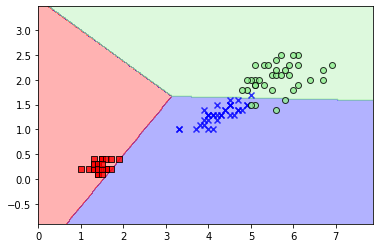

In [30]:
ppn2 = SGDClassifier(loss='perceptron')
ppn2.fit(x_train, y_train)
plot_decision_regions(x=x_train, y=y_train, classifier=ppn2) 

## 커널 SVM을 사용하여 비선형 문제 풀기

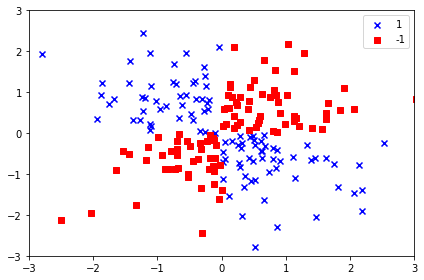

In [31]:
import matplotlib.pyplot as plt
import numpy as np
# 임의적인 데이터 생성하기
np.random.seed(1)
x_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(x_xor[:, 0] > 0,
                       x_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)
#시각화
plt.scatter(x_xor[y_xor == 1, 0],
            x_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(x_xor[y_xor == -1, 0],
            x_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()
# 리니어 모델로는 예측할 수 없음

#####  커널 기법을 사용해 고차원 공간에서 분할 초평면 찾기

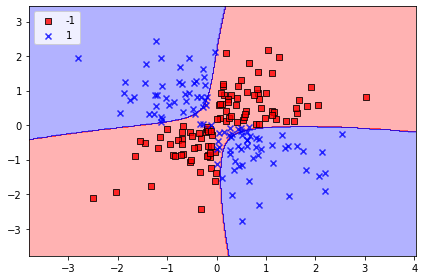

In [32]:
svm = SVC(kernel='rbf', random_state= 1, gamma=0.1, C=10) #gamma 데이터의 영향력 C cost
svm.fit(x_xor, y_xor)
plot_decision_regions(x=x_xor, y=y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

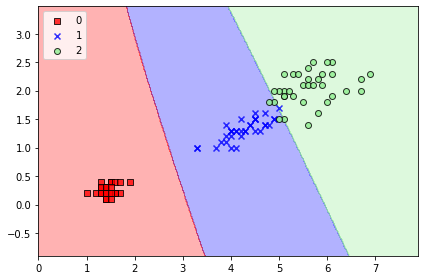

In [33]:
svm = SVC(kernel='rbf', random_state= 1, gamma=0.1, C=0.1) 
#gamma 데이터의 영향력(역수) C cost
# C가 클수록 오차를 허용하지 않는다
# gamma가 클수록 데이터의 영향력이 작아진다
svm.fit(x_train, y_train)
plot_decision_regions(x=x_train, y=y_train, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## 결정 트리 학습

##### 정보 이득 최대화-자원을 최대로 활용하기

In [34]:
import matplotlib.pyplot as plt
import numpy as np

def gini(p):
    return p * (1 - p) + (1 - p) * (1 - (1 - p))


def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))


def error(p):
    return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e * 0.5 if e else None for e in ent]
err = [error(i) for i in x]

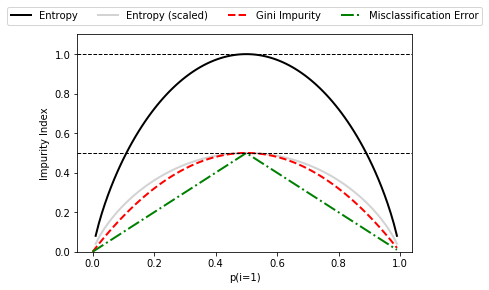

In [35]:
fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], 
                          ['Entropy', 'Entropy (scaled)', 
                           'Gini Impurity', 'Misclassification Error'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=5, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()

In [43]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # 마커와 컬러맵을 설정합니다.
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # 테스트 샘플을 부각하여 그립니다.
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

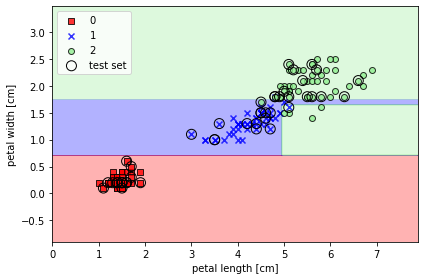

In [44]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree.fit(x_train,y_train)
x_combined = np.vstack((x_train, x_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(x_combined, y_combined, 
                      classifier=tree, test_idx =range(105, 150) )

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [41]:
predictions = tree.predict(x_test)
accuracy_score(predictions, y_test)

0.9333333333333333